# Overview
Tushare是一个开放的股票数据获取平台，从上面可以获得比较丰富的股票基本以及交易数据

# Installation

因为tushare大量数据返回类型为pandas dataframe，因此需要先安装Pandas。

>```py
> pip install pandas
> pip install tushare
```

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import tushare as ts
import time
import json
import matplotlib.pyplot as plt
from datetime import datetime

import pymongo
from pymongo import MongoClient

# 数据结构设计
从Tushare抓取到的股票交易数据会被保存到MongoDB，结构如下：<p>
Database name: StockDB<p>
collections:<p>
- StockBasic: to store the basic information of a stock<p>
```py
{
    'name':'名称',
    'code':'股票代码',
    'industry':'所属行业',
    'area':'地区',
    'pe':市盈率,
    'outstanding':流通股本,
    'totals':总股本（万）,
    'totalAssets':总资产（万）,
    'liquidAssets:流动资产,
    'fixedAssets':固定资产,
    'Reserved':公积金,
    'ReservedPerShare':每股公积金,
    'esp':每股收益,
    'bvps':每股净资,
    'pb':市净率,
    'timeToMarket':上市日期,
    'Transactions':[
    {
        'Date':'日期',
        'Open':'开盘价',
        'Close':'收盘价',
        'High':'最高价',
        'Low':'最低价',
        'volume':'成交量',
        'price_change':'价格变动',
        'p_change':'涨跌幅',
        'ma5':'5日均价',
        'ma10':10日均价,
        'ma20':15日均价,
        'v_ma5':5日均量,
        'v_ma10':10日均量,
        'v_ma20':20日均量,
        'turnover':换手率[注：指数无此项]
    },
    'created':,
    'lastModified':,
}
```    
-- name, indutry
-- transaction data(daily)
- StockNews: to store scrapied stock relevant news


In [2]:
# Build MongoDB Database
conn = MongoClient("mongodb://localhost")
db = conn.StockDB
coll = db.StockBasic

In [4]:
# 获取股票基本信息
# 所返回的类型是pandas.core.frame.DataFrame
dfBasic = ts.get_stock_basics()
dfBasic.count()

name                3189
industry            3189
area                3189
pe                  3189
outstanding         3189
totals              3189
totalAssets         3189
liquidAssets        3189
fixedAssets         3189
reserved            3189
reservedPerShare    3189
esp                 3189
bvps                3189
pb                  3189
timeToMarket        3189
undp                3189
perundp             3189
rev                 3189
profit              3189
gpr                 3189
npr                 3189
holders             3189
dtype: int64

In [64]:
for r in dfBasic.profit:
    print(r.header)

AttributeError: 'numpy.float64' object has no attribute 'header'

In [34]:
dfBasic.loc[0]['code']

TypeError: cannot do label indexing on <class 'pandas.indexes.base.Index'> with these indexers [0] of <class 'int'>

In [25]:
dfIndustry = ts.get_industry_classified()
dfIndustry.count()


[Getting data:]#################################################

code      2876
name      2876
c_name    2876
dtype: int64

In [5]:
dfIndustry.loc[1]['code']

'600074'

In [6]:
for i in range(0,len(dfIndustry)):
    print("code:%s %s industry:%s" 
          %(dfIndustry.loc[i]['code'],
            dfIndustry.loc[i]['name'],
            dfIndustry.loc[i]['c_name'])
         )

code:600050 中国联通 industry:电子信息
code:600074 保千里 industry:电子信息
code:600076 康欣新材 industry:电子信息
code:600100 同方股份 industry:电子信息
code:600105 永鼎股份 industry:电子信息
code:600130 波导股份 industry:电子信息
code:600198 大唐电信 industry:电子信息
code:600271 航天信息 industry:电子信息
code:600288 大恒科技 industry:电子信息
code:600289 亿阳信通 industry:电子信息
code:600330 天通股份 industry:电子信息
code:600345 长江通信 industry:电子信息
code:600406 国电南瑞 industry:电子信息
code:600410 华胜天成 industry:电子信息
code:600446 金证股份 industry:电子信息
code:600455 博通股份 industry:电子信息
code:600476 湘邮科技 industry:电子信息
code:600485 信威集团 industry:电子信息
code:600487 亨通光电 industry:电子信息
code:600498 烽火通信 industry:电子信息
code:600522 中天科技 industry:电子信息
code:600536 中国软件 industry:电子信息
code:600556 慧球科技 industry:电子信息
code:600562 国睿科技 industry:电子信息
code:600570 恒生电子 industry:电子信息
code:600571 信雅达 industry:电子信息
code:600588 用友网络 industry:电子信息
code:600601 方正科技 industry:电子信息
code:600608 ST沪科 industry:电子信息
code:600654 中安消 industry:电子信息
code:600677 航天通信 industry:电子信息
code:600680 上海普天 industry:电子信息
code:600718

In [7]:
for i in coll.find({'name':'惠泉啤酒'}):#industry':'红黄药酒'}):
    print(i)

ServerSelectionTimeoutError: localhost:27017: [WinError 10061] 由于目标计算机积极拒绝，无法连接。

In [40]:
for i in range(0,len(dfIndustry)):
    coll.update({'name':dfIndustry.loc[i]['name']},
                {'$set',
                     {'code':dfIndustry.loc[i]['code'],
                      'industry':dfIndustry.loc[i]['c_name'],
                     'name':dfIndustry.loc[i]['name']}
                },
                upsert=True)

TypeError: unhashable type: 'dict'

In [41]:
coll.drop()
coll.insert_many(json.loads(df.to_json(orient='records')))

NameError: name 'df' is not defined

In [21]:
#保存股票基本信息
today = time.strftime("%Y-%m-%d", time.localtime())
for i in range(0, len(df)):
    ds = {
        'name':'',
        'code':'',
        'industry':'',
        'area':'',
        'pe':0,
        'outstanding':0,
        'totals':0,
        'totalAssets':0,
        'liquidAssets':0,
        'fixedAssets':0,
        'Reserved':0,
        'ReservedPerShare':0,
        'esp':0,
        'bvps':0,
        'pb':0,
        'timeToMarket':'',
        'created':'',
        'lastModified':'',
    }
    #先检查数据库中最后更新日期是否为同一天，如果是则不更新

    ds['created']=today
    ds['lastModified']=today
        
    ds['name']=df.loc[i]['name']
    ds['code']=df.loc[i]['code']
    ds['industry']=df.loc[i]['industry']
    ds['area']=df.loc[i]['area']
    ds['pe']=df.loc[i]['pe']
    ds['outstanding']=df.loc[i]['outstanding']
    ds['totals']=df.loc[i]['totals']
    ds['totalAssets']=df.loc[i]['totalAssets']
    ds['liquidAssets']=df.loc[i]['liquidAssets']
    ds['fixedAssets']=df.loc[i]['fixedAssets']
    ds['Reserved']=df.loc[i]['Reserved']
    ds['ReservedPerShare']=df.loc[i]['ReservedPerShare']
    ds['esp']=df.loc[i]['esp']
    ds['bvps']=df.loc[i]['bvps']
    ds['pb']=df.loc[i]['pb']
        
    ds['lastModified']=today
    ds['created']=ds['created']
        
    ds
        
    #data = coll.find({'code':ds['code']})
    #if data:
    #    coll.update({'code':ds['code']},ds,true)
    #else:
    #    coll.insert(ds)
            
    #if coll.find({'code':ds['code'],'lastModified':today}).count() != 0:

TypeError: cannot do label indexing on <class 'pandas.indexes.base.Index'> with these indexers [0] of <class 'int'>

In [1]:
#获得特定股票的历史交易数据
dsHistory = ts.get_hist_data('002657')
dsHistory[:5]

NameError: name 'ts' is not defined

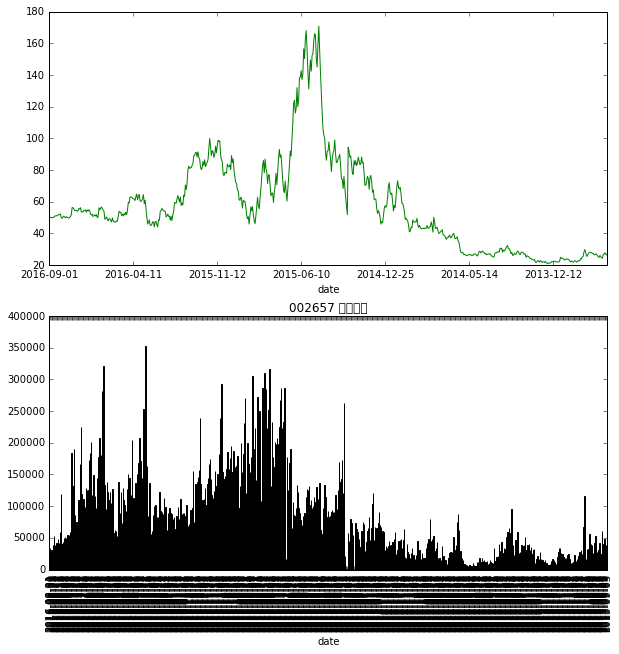

In [127]:
fig = plt.figure(figsize=(10,10))


ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)

ax2.set_title('002657 中科金财')
dsHistory['close'].plot(ax=ax1,style='g-')
dsHistory['volume'].plot(kind='bar',ax=ax2,color='k')



In [121]:
plt.plot(np.arrange(10))

AttributeError: module 'numpy' has no attribute 'arrange'